In [23]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [24]:
#Load data
data = np.genfromtxt('./files/chungkhoan/excel_acb.csv', delimiter = ",", skip_header = 1)

In [25]:
data.shape

(3664, 14)

In [26]:
open_price = data[:,7]
close_price = data[:,10]
print(open_price)
print(close_price)

[ 36.1   35.35  36.   ... 145.   143.2  120.  ]
[ 35.55  36.    35.5  ... 138.4  134.7  130.2 ]


In [81]:
# Phân tích về sự mở rộng giá mở cửa
max_open_price = np.max(open_price)
print('Max:', np.max(open_price))

min_open_price = np.min(open_price)
print('Min:', np.min(open_price))

ran = np.ptp(open_price)
print('Range:',ran)

var = np.var(open_price)
print("Variance:", var)

Max: 300.0
Min: 14.4
Range: 285.6
Variance: 1807.5687408809354


In [77]:
# Phân tích Khuynh tập trung giá mở cửa
print('Số phiên giao dịch:', np.count_nonzero(open_price))

mean = np.mean(open_price)
print('Mean:', np.mean(open_price))


median_open_price = np.min(open_price)
print('Median:', np.median(open_price))

#mode
count, bins = np.histogram(open_price, bins = 50)
max_count_index = np.argmax(count)
mode = (bins[max_count_index] + bins[max_count_index+1]) / 2
print('Mode: ', mode)

Số phiên giao dịch: 3664
Mean: 39.28587609170305
Median: 25.2
Mode:  17.256


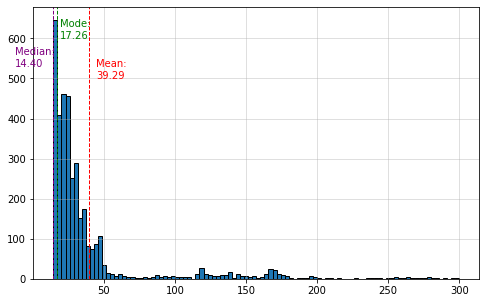

In [75]:
#Biểu đồ phân bố giá mở cửa
fig,ax = plt.subplots(figsize = (8,5))
ax.hist(open_price, bins = 100, edgecolor='k')

ax.axvline(mean, color='red', linestyle = 'dashed', linewidth=1)
ax.text(mean + 5, 500, f"Mean:\n{mean:.2f}", color='red')

ax.axvline(mode, color='green', linestyle = 'dashed', linewidth=1)
ax.text(mode + 2, 600, f"Mode:\n{mode:.2f}", color='green')

ax.axvline(median_open_price, color='purple', linestyle = 'dashed', linewidth=1)
ax.text(median_open_price - 27, 530, f"Median:\n{median_open_price:.2f}", color='purple')

plt.grid(alpha = 0.5)
plt.show()